# Resolución de una ecuación dispersiva lineal mediante Transformada de Fourier

$$
\frac{\partial  u}{\partial t } + a\, \frac{\partial^2 u}{\partial x^3} = 0, \qquad   x\in \mathbb{R}, \quad t>0.
$$
La  condición inicial es $u(0,x) = f(x).$ Se buscan soluciones tales que 
$$
\int_{-\infty}^{\infty} |u(t,x)|^2\, dx <\infty.
$$
 
 

## Solución explícita
Ver por ejemplo [P. Olver](http://www-users.math.umn.edu/~olver/pde.html) Section 8.5 Dispersion and solitons

$$
u(t,x) =  \frac{1}{\sqrt[3]{3t}}\, \int_{-\infty}^{\infty}
       f(\xi)\,Ai\left( \frac{x-\xi}{\sqrt[3]{3t}}\right)d\xi
$$ 
Se tiene
$$
u(t,x) = \frac{1}{\sqrt[3]{3t}}\, f(x)*Ai(x)
$$
donde $*$ indica la operación de convoluciónr. Esta alternativa de cálculo permite usar  np.convolve de numpy

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

In [103]:
t = 0.0130707
npoints = 1000
xm = 15
x = np.linspace(-xm, xm, npoints)
# algunos datos iniciales interesantes
bloque = np.piecewise(x, [np.abs(x+1) < 2, np.abs(x+1) > 2], [1, 0])
diente = np.piecewise(x, [np.abs(x) < 1, np.abs(x) > 1], [lambda x: 1-np.abs(x), 0])
gsn = np.exp(-x**2)

In [104]:
# asignación del dato iniciala f
f = diente
def perfil(t):
    ai, aip, bi, bip = special.airy(x/((3*t)**(1/3)))
    return (2*xm)/((3*t)**(1/3))*np.convolve(f, ai, 'same')/npoints

## Animación

In [96]:
import matplotlib.animation as animation

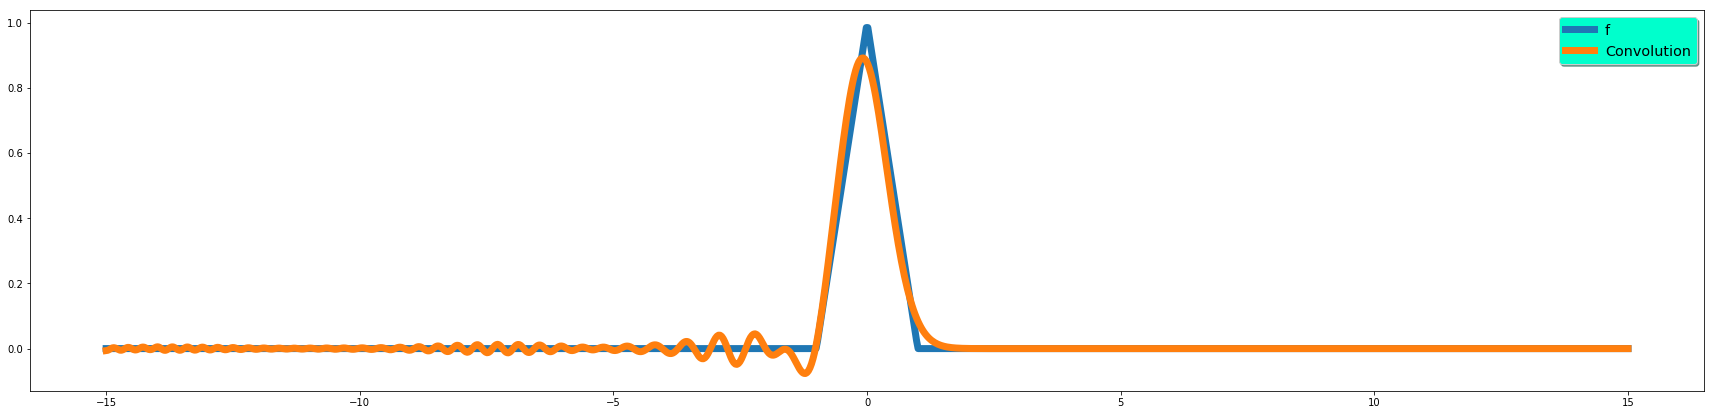

In [105]:
z = perfil(0.01)
fig = plt.figure(figsize=(30,7))
ax = fig.add_subplot(111)
#ax.plot(x,ai, lw = 7, label='Airy')
ax.plot(x,f, lw = 7, label='f')
ax.plot(x,z, lw = 7, label='Convolution')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
legend.get_frame().set_facecolor('#00FFCC')
plt.show()

(-0.5, 1.5)

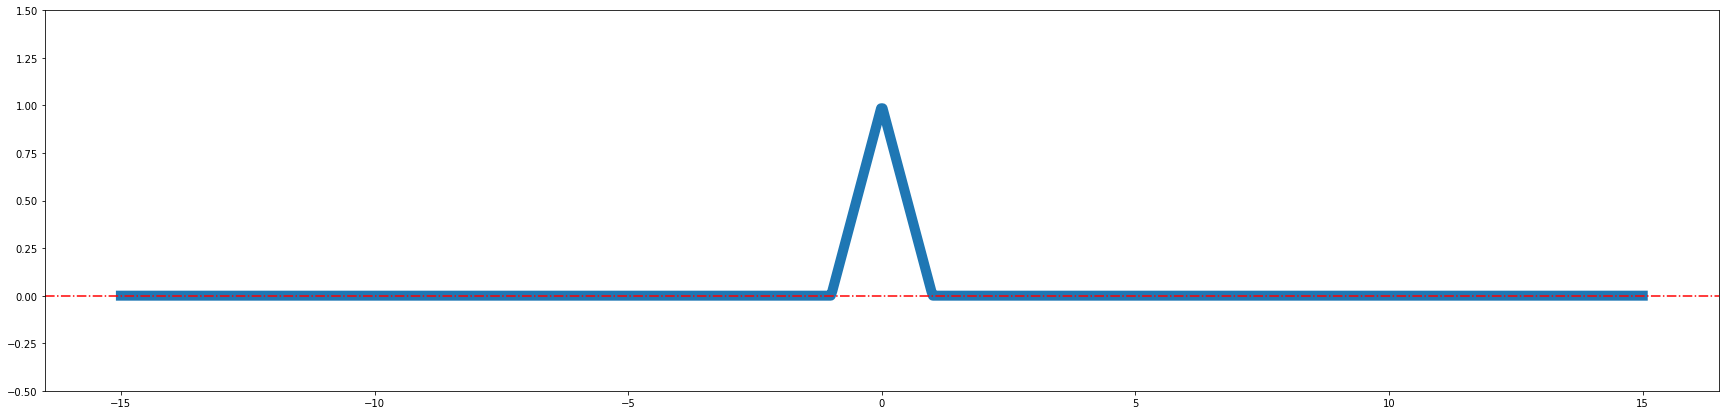

In [106]:
fig = plt.figure(figsize=(30,7))
ax = fig.add_subplot(111)
line, = ax.plot(x, f, lw =10)
ax.axhline(y=0.0, color='r', linestyle='-.')
ax.set_ylim([-0.5, 1.5])

In [100]:
def animacion(i):
    line.set_ydata(perfil(i/100))  # update the data
    return line,

In [101]:
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

In [102]:
ani = animation.FuncAnimation(fig, animacion, np.arange(1, 300), init_func=init,
                              interval=50, blit=True)
ani.save('onda_dispersiva.mp4', metadata={'artist':'Socarronte'})
plt.show()